### Now we will begin the exploratory data analysis by using the dataset which has been made suitable for processing

-----

####  - Exploratory Data Analysis helps us to maximize insight into a dataset and discover underlying structure.  EDA helps is generally employed to get specific about a general objective. 
#### - Example: The general objective of a marketing department maybe to increase outreach of product. In this case EDA will help us to narrow down into specific objective of which consumer segment must be targeted to increase their awareness of the product so that client base in that particular segment increases. 
#### - However, in this particular case, we have clear objective of predicting house prices. Hence, we will be doing EDA to get insight into what features are affecting our response variable and how they are doing so.
----

#### EDA procedure:
#### 1. I have identified key numeric and float features affecting the target. 
#### 2. Then, I have graphically visualized them and drawn observations. 
-----

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%%capture
#importing the notebook where we had done preprocessing
%run C:/Users/admin/Desktop/EeD/Python/Project/Preprocessing.ipynb

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876
Kurtosis: 6.536282


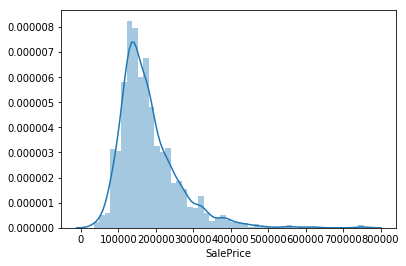

In [3]:

'''
Let's begin by analysing our dependent variable
'''
ah_data['SalePrice'] = ah_data['SalePrice'].astype('int64')
print(ah_data.SalePrice.describe())
sns.distplot(ah_data.SalePrice)
print("Skewness: %f" % ah_data['SalePrice'].skew())
print("Kurtosis: %f" % ah_data['SalePrice'].kurt())

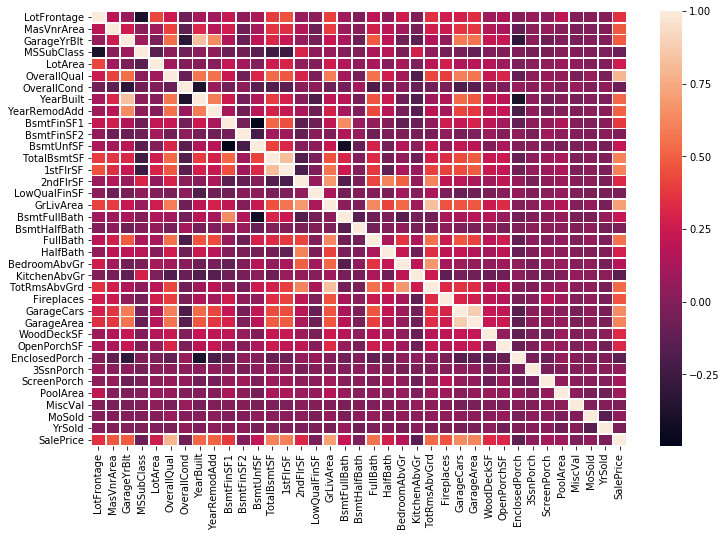

In [4]:
#adding target saleprice to numeric columns
price = ['SalePrice']
numbers_columns = numbers_columns + price
#calculating the correlation matrix
corr = ah_data[numbers_columns].corr()

f, ax = plt.subplots(figsize=(12, 8))

# plotting the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.7, ax=ax)

In [5]:
#now selecting features with datatype integer 
corr1 = corr[['SalePrice']].sort_values(by = 'SalePrice', ascending=False)
impfeatures_int = corr1.head(20)
impfeatures_int = impfeatures_int.transpose()
impfeatures_int = impfeatures_int.columns.tolist()
impfeatures_int = impfeatures_int[1:]
impfeatures_int

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath']

In [6]:
char_text_columns.append('SalePrice')

In [7]:
#checking out the characteror string columns
ah_data_char = ah_data[char_text_columns]


#### By observation we can instinctively identify that some of the features will affect our target.
#### In order to find out these faetures, we need to one hot encode them and get a correlation matrix in style similar to what we did for columns with dtype integer or float.

In [8]:
#one hot encoding the columns with data type character 
ah_data_char_n = pd.get_dummies(ah_data_char)

In [9]:
#selecting features with datatype character
corr2 = ah_data_char_n.corr()
corr2 = corr2[['SalePrice']]
corr2 = corr2.sort_values(by = 'SalePrice', ascending = False)
#the first and last 5 features having appreciable positive or negative correlations will be worth exploring
corr2_first = corr2.head(10)
corr2_last = corr2.tail(10)
frames = [corr2_first, corr2_last]
corr2 = pd.concat(frames)
corr2 = corr2.transpose()
impfeatures_char = corr2.columns.tolist()
impfeatures_char = impfeatures_char[1:]
impfeatures_char

['BsmtQual_Ex',
 'KitchenQual_Ex',
 'Foundation_PConc',
 'ExterQual_Gd',
 'ExterQual_Ex',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'Neighborhood_NridgHt',
 'LotShape_Reg',
 'MSZoning_RM',
 'HeatingQC_TA',
 'Foundation_CBlock',
 'GarageType_Detchd',
 'MasVnrType_None',
 'GarageFinish_Unf',
 'BsmtQual_TA',
 'KitchenQual_TA',
 'ExterQual_TA']

In [10]:
#selecting the features which include the new features created after one hot encoding the character features in dataset
impfeatures_char = ['BsmtQual',
 'KitchenQual',
 'Foundation',
 'ExterQual',
 'BsmtFinType1',
 'HeatingQC','ExterQual']

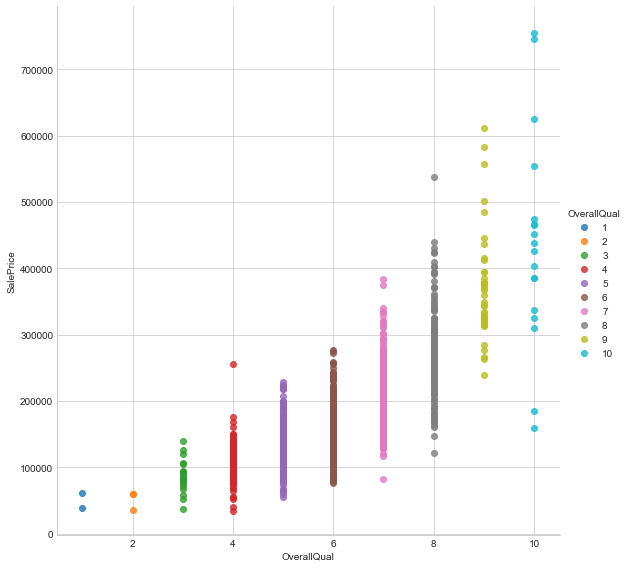

In [11]:
'''
Now, let's begin by exploring the numerical features

'''
sns.set_style("whitegrid")
sns.lmplot(x = 'OverallQual', y = 'SalePrice', data = ah_data, hue='OverallQual', size=8, fit_reg=False)

  

#### Observations:
1. There is a positive correlaation between 'SalePrice' and 'Overall Quality' Houses having better quality fetch more price. 
2. The positive trend of 'higher Quality means higher SalePrice' is much more pronounced in houses having Overaall Quality < 8. For, houses with Overall Quality >8, the trend not that strongly oberved because many houses with Overall Quality factor less than 8 have fetched prices equal to or higher than those with Overall Quality factor > 8. This means that there are other factors other than Overall Quality which is influencing target.
 

In [12]:
'''
We need to construct one more feature which will hold the value of no. of storeys of the house. This will aid us in 
visualization of how house storeys affect the price. 
'''
def f(row):
    if row['1stFlrSF'] == 0:
        val = "Single Storey"
    elif row['2ndFlrSF'] == 0:
        val = "Double Storey"
    else:
        val = "Triple Storey"
    return val

ah_data['Storeys'] = ah_data.apply(f, axis = 1)

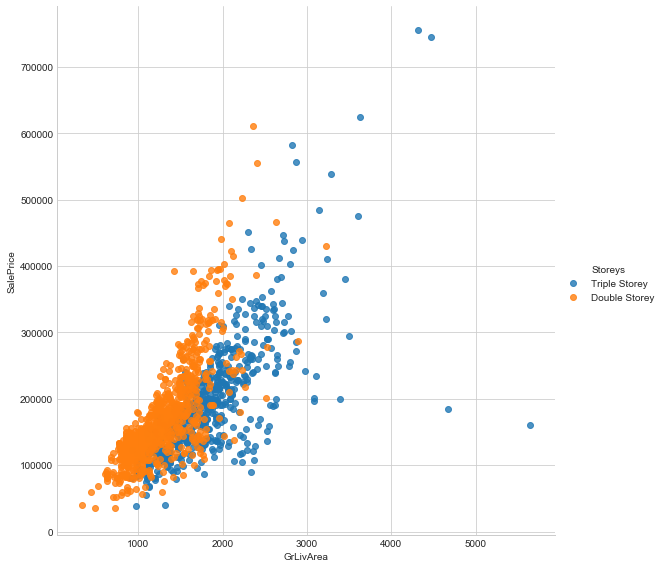

In [13]:
sns.lmplot(x =  'GrLivArea', y = 'SalePrice', data = ah_data, size = 8, hue = 'Storeys', fit_reg=False)

#### Observations:
1. There is a strong positive correlation between Ground Floor Living Area and SalePrice. This is in sync with our intuition that larger the house, more it should cost. Also, as per intuition triple storey houses should cost more due to larger area which is reflected by the distribution as well.
2. However, this idea holds true till 3500 sq ft. living area. Beyond that size, larger area corresponds to lower prices. This might be explained by other factors like in which neighborhood the house is, when it's constructed, whether it's remodelled, what's the overall quality and so on.
3. Majority of the houses have Ground Floor living area in the range of 1000 - 2000 square foot with price is the range of 40,000 to 400,000 USD.
4. There are certain outliers as well having high predictor value but proportionately low value of response.

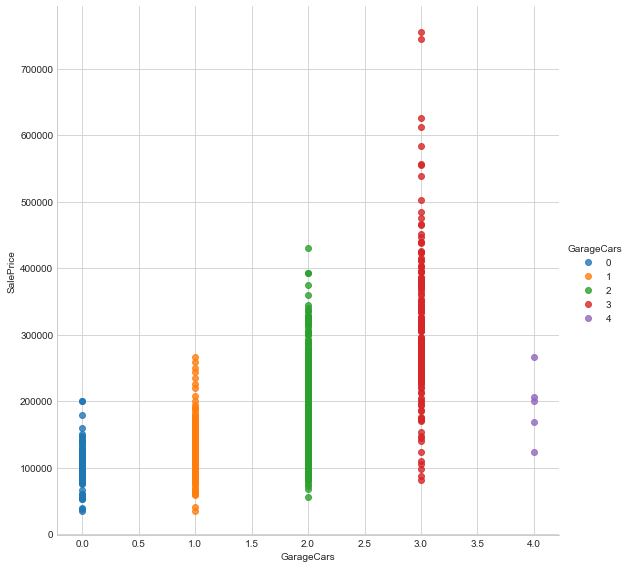

In [14]:
sns.lmplot(x = 'GarageCars', y = 'SalePrice', data = ah_data, size = 8, hue = 'GarageCars', fit_reg=False)

#### Observations:
1. There is a positive correlation between no. of cars garaage can accommodate and SalePrice. This follows from the intuition that more cars garage can hold, bigger it is which corresponds to bigger house size as well and hence, higher SalePrice.
2. However, the trend is not perfectly followed. Houses with bigger garages also have equal or less SalePrice than houses with relatively smaller garages. Therefore, we can conclude that there are other factors which are affecting SalePrice in more substantial way. 
3. The trend especially breaks down for houses with garage having capacity of 4 cars. The SalePrices are relatively very low. These houses warrant a deeper analysis as what is causing this.

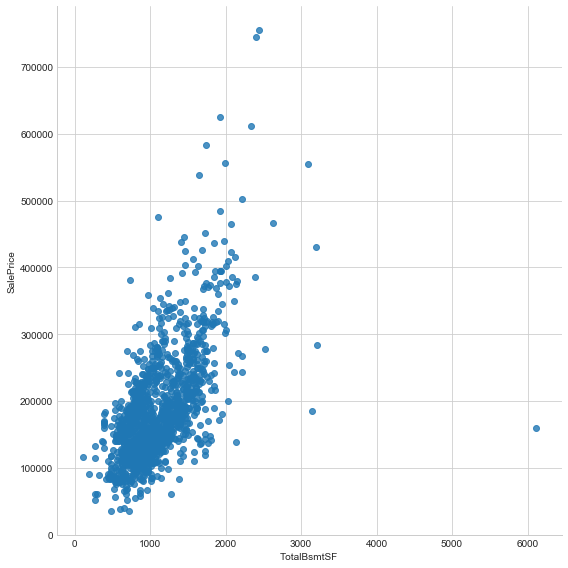

In [15]:
#Filtering out the values where TotalBsmtSF is 0. This is error due to recording of incorrect value of observation
ah_data['TotalBsmtSF'] = ah_data['TotalBsmtSF'].replace(0, np.nan)
ah_data['TotalBsmtSF'].dropna(axis=0, how='any', inplace=True)

sns.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data = ah_data, size = 8, fit_reg=False)


#### Observations:
1. There is a positive correlation between basement surface area and SalePrice. Intuitively, larger basement area corresponds to larger house size and correspondingly higher sale price. 
2. This positive corelaation seems to follow till 2500 sq. ft basement area after which the trend isnot acutely followed and some aberrations are observed confirming that there are factors besides basement area which are synergetically affecting the sale price. 

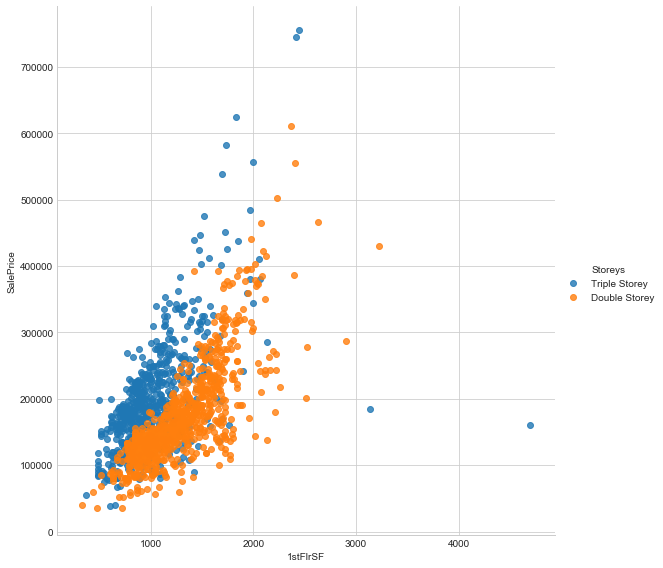

In [16]:
sns.lmplot(x = '1stFlrSF', y = 'SalePrice', data = ah_data, size = 8, hue = 'Storeys', fit_reg=False)

#### Observations:
The observations which we made for 'ground living area' and 'basement surface area' also hold true for '1st Floor surface area' as all these factors are inherently related the area of the house and as such correlated in similar way to the price of the house. 



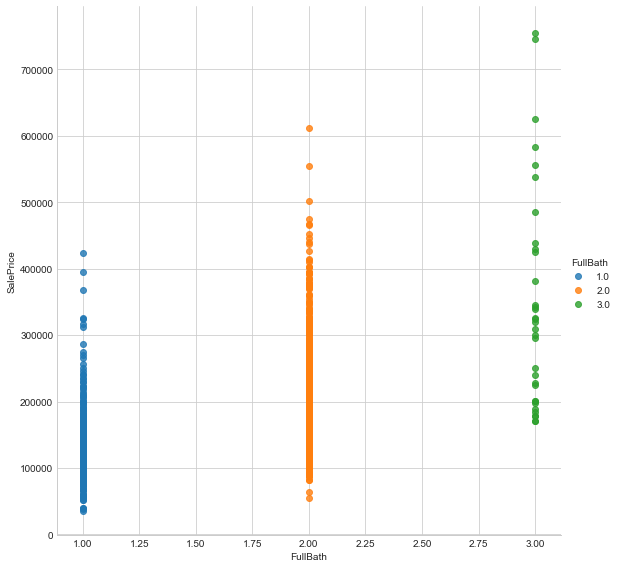

In [17]:
#dropping houses with Bathrooms as 0, assuming them to be observations erroneously made during data collection
ah_data['FullBath'] = ah_data['FullBath'].replace(0,np.nan)
ah_data['FullBath'].dropna(axis = 0, how = any, inplace = True)

sns.lmplot(x = 'FullBath', y = 'SalePrice', data = ah_data, size = 8, hue = 'FullBath', fit_reg=False)

#### Observations:
1. Intuitively we can understand that no. of bathrooms is correlated with house size. Hence, correlation between no.of bathrooms and sale price is warranted.  
2. There is a clear positive trend between no. of bathrooms and sale price.
3. However, some of the houses having 3 bathrooms have sold at a price lower than those with 1 or 2 bathrooms. This is clear indiaction of other factors at play like neighborhood, overall quality of house, area of the house and so on. 

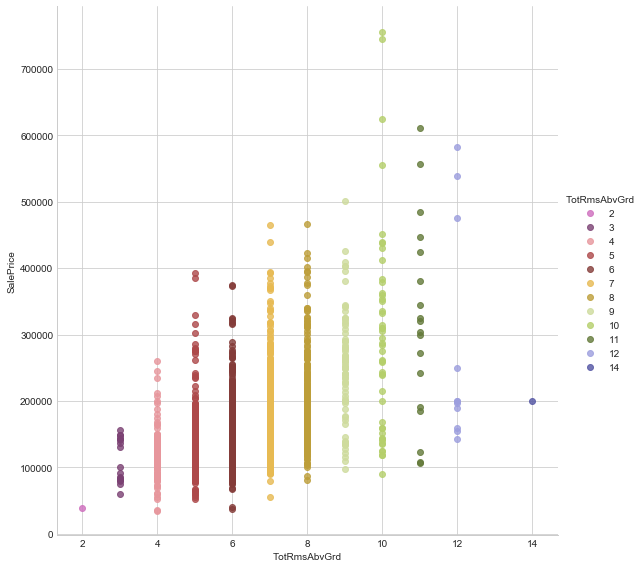

In [18]:
sns.lmplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = ah_data, hue = 'TotRmsAbvGrd', size = 8, fit_reg = False, palette = 'tab20b_r')


#### Observations:
1. Although we see a increasing trend between rooms above ground and sale price, the relationship is not as strong. 
2. There are many instances wherein houses with more rooms have been sold for prices equal to or lower than corresponding houses with lower number of rooms. This strongly suggests that there are other factors at play influencing buyers decision. 


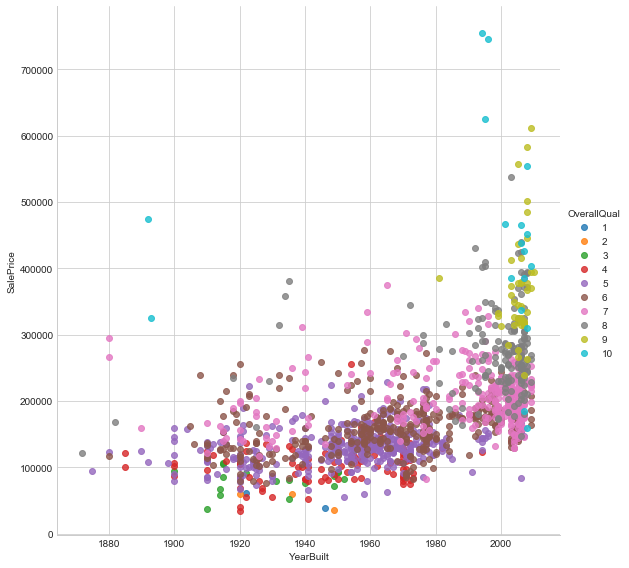

In [19]:
sns.lmplot(x = 'YearBuilt', y = 'SalePrice', data = ah_data, size = 8, fit_reg = False, hue = 'OverallQual')

#### Observations:
1. The visualisation suggests that newer houses (built in recent years) have better quality and have been sold at higher prices than older houses.
2. There is a slight correlation between age of the house and price but it's not pronounced. Houses built between the years 1920 to 1990 have a definite price range of 50,000 to 200,000 USD and general overall quality level of 5-8 points. The price range is very broad for given age bracket of the house to show any definite trend. This denotes that ther are factors other than which buyers are giving more importance while buying a house. 

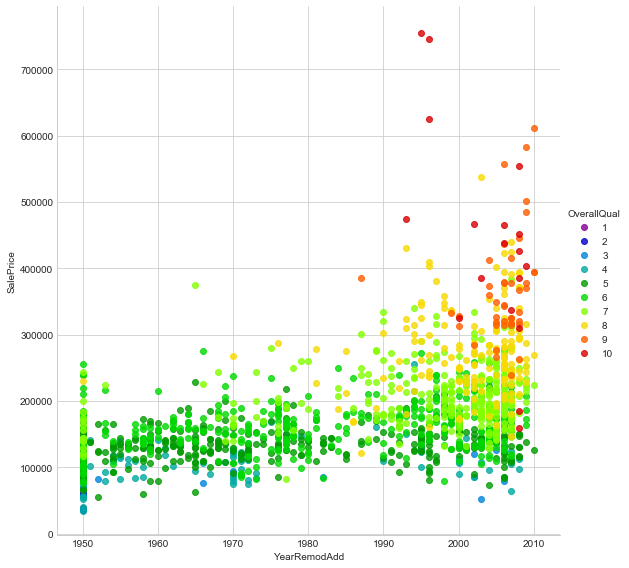

In [20]:
sns.lmplot(x = 'YearRemodAdd', y = 'SalePrice', data = ah_data, size = 8, fit_reg = False, hue = 'OverallQual',palette = 'nipy_spectral')


#### Observations:
Here we are observing a distribution similar to that between price vs year built.
Houses which have been remodelled have been rated in the range 5-7 which can be considered as above average rating. 
However, barring houses which have been remodelled in recent years (post 2005) fetching higher prices, there is no clear trend visible between year remodelled and sale price. 
